In [10]:
import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import geopandas as gpd

from shapely.geometry import Point
from shapely import wkt
import contextily as ctx
from sklearn.neighbors import KernelDensity

**What are the transportation barriers faced by community college students in East Bay community colleges and how do they vary by demographic group?**

**Caregiver Status Demographic Data**

In [11]:
survey = pd.read_csv('Qualtrics_May 27, 2025_labels.csv')
survey_caregiver = survey[survey['Question 4']== 'Yes']
survey_notcaregiver = survey[survey['Question 4']== 'No']

C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\2966033010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_caregiver['Group'] = 'Caregiver'
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\2966033010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_notcaregiver['Group'] = 'Non-Caregiver'


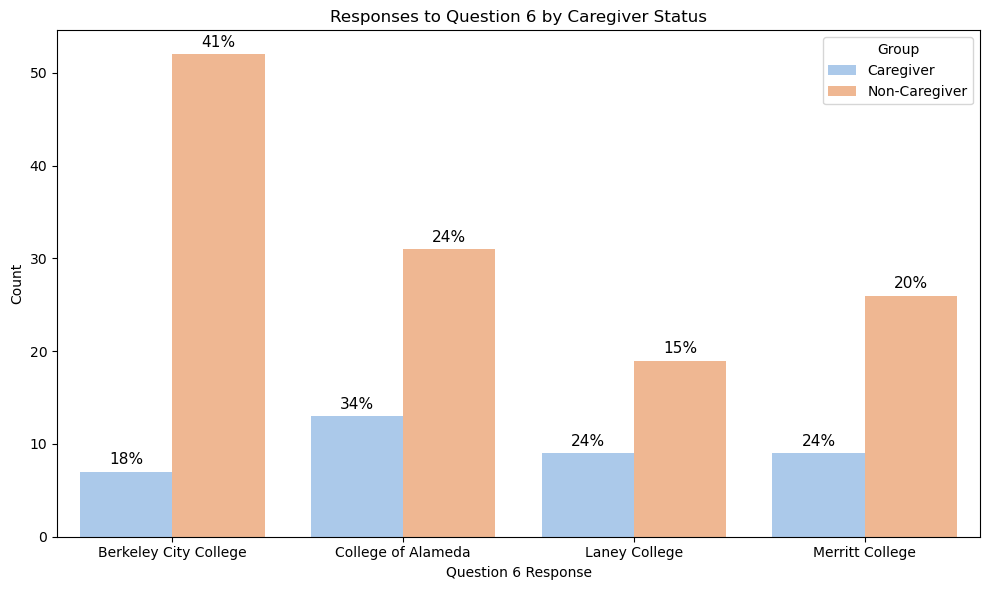

In [12]:
# Question 6 : Primary Community College

# Add a 'Group' column to each DataFrame
survey_caregiver['Group'] = 'Caregiver'
survey_notcaregiver['Group'] = 'Non-Caregiver'

# Combine the two DataFrames
combined_survey = pd.concat([survey_caregiver, survey_notcaregiver])

# Calculate counts and percentages within each group for 'Question 6'
count_data = combined_survey.groupby(['Group', 'Question 6']).size().reset_index(name='Count')

# Calculate total counts per group for percentage calculation
total_per_group = combined_survey.groupby('Group').size().reset_index(name='Total')

# Merge to get total counts alongside counts
count_data = count_data.merge(total_per_group, on='Group')

# Calculate percentage within each group
count_data['Percentage'] = (count_data['Count'] / count_data['Total']) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=count_data,
    x='Question 6',
    y='Count',
    hue='Group',
    palette='pastel'
)

# Add percentage labels on top of each bar (no decimals)
for p, (_, row) in zip(ax.patches, count_data.iterrows()):
    height = p.get_height()
    percent_label = f"{int(round(row['Percentage']))}%"
    ax.annotate(percent_label, 
                (p.get_x() + p.get_width() / 2., height + 0.5), 
                ha='center', va='bottom', fontsize=11)

ax.set_title('Responses to Question 6 by Caregiver Status')
ax.set_xlabel('Question 6 Response')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()




C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\1475087724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_caregiver['More than one College'] = survey_caregiver.apply(
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\1475087724.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_notcaregiver['More than one College'] = survey_notcaregiver.apply(
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\1475087724.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

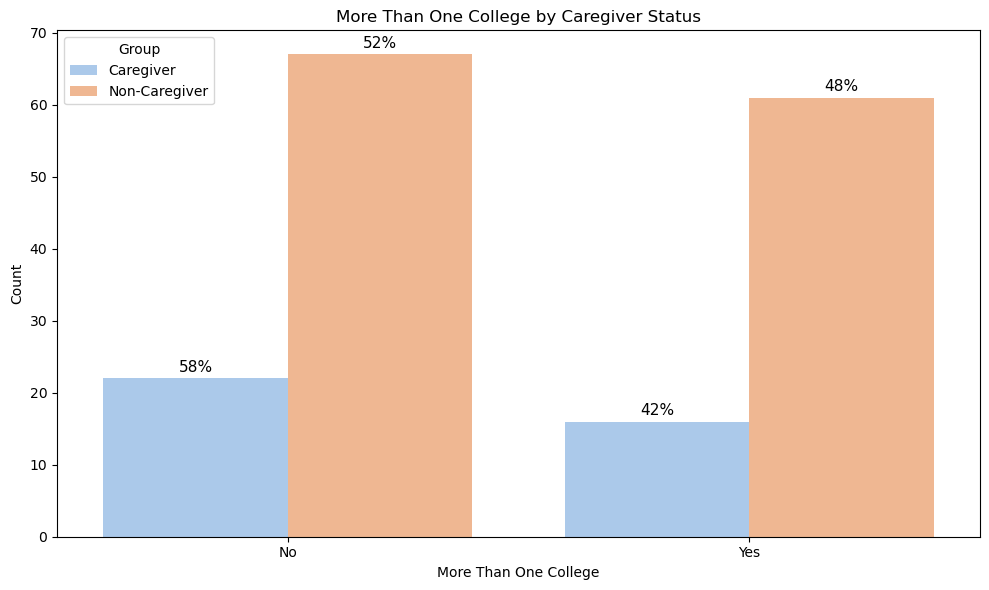

In [13]:
# Question 7: Attendance of more than one CC

# For survey_caregiver
survey_caregiver['More than one College'] = survey_caregiver.apply(
    lambda row: 'No' if (
        (row['Question 6'] == row['Question 7']) or
        (isinstance(row['Question 7'], str) and (
            row['Question 7'].startswith('I do not') or
            row['Question 7'].startswith('I take online')
        ))
    ) else 'Yes',
    axis=1
)

# For survey_notcaregiver
survey_notcaregiver['More than one College'] = survey_notcaregiver.apply(
    lambda row: 'No' if (
        (row['Question 6'] == row['Question 7']) or
        (isinstance(row['Question 7'], str) and (
            row['Question 7'].startswith('I do not') or
            row['Question 7'].startswith('I take online')
        ))
    ) else 'Yes',
    axis=1
)


# Add a 'Group' column to each DataFrame
survey_caregiver['Group'] = 'Caregiver'
survey_notcaregiver['Group'] = 'Non-Caregiver'

# Combine the two DataFrames
combined_survey = pd.concat([survey_caregiver, survey_notcaregiver])

# Calculate counts and percentages within each group for 'More than one College'
count_data = combined_survey.groupby(['Group', 'More than one College']).size().reset_index(name='Count')

total_per_group = combined_survey.groupby('Group').size().reset_index(name='Total')

count_data = count_data.merge(total_per_group, on='Group')

count_data['Percentage'] = (count_data['Count'] / count_data['Total']) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=count_data,
    x='More than one College',
    y='Count',
    hue='Group',
    palette='pastel'
)

# Add percentage labels on top of each bar (no decimals)
for p, (_, row) in zip(ax.patches, count_data.iterrows()):
    height = p.get_height()
    percent_label = f"{int(round(row['Percentage']))}%"
    ax.annotate(percent_label, 
                (p.get_x() + p.get_width() / 2., height + 0.5), 
                ha='center', va='bottom', fontsize=11)

ax.set_title('More Than One College by Caregiver Status')
ax.set_xlabel('More Than One College')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3166196695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_caregiver['Group'] = 'Caregiver'
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3166196695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_notcaregiver['Group'] = 'Non-Caregiver'
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3166196695.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a

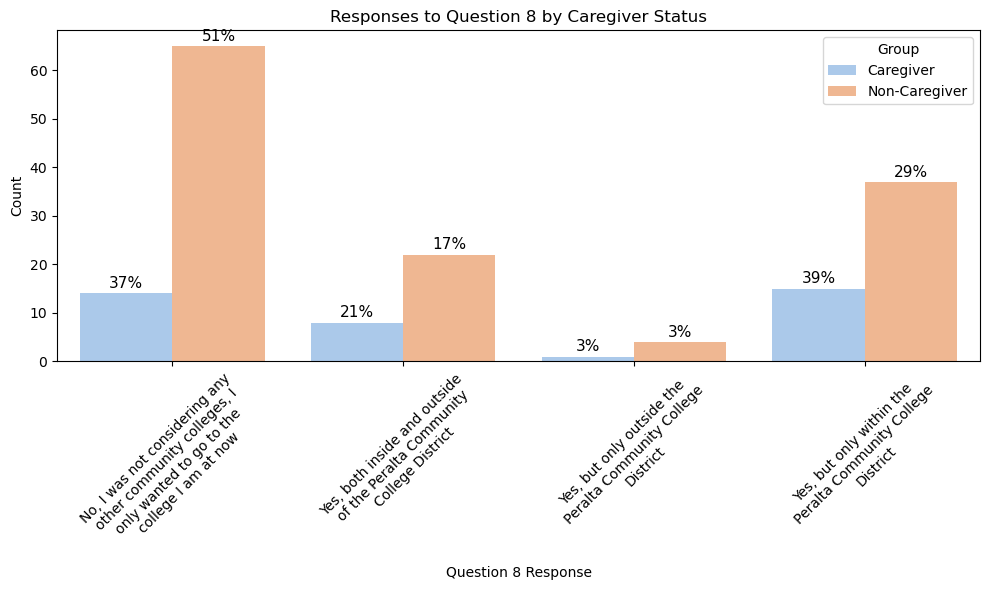

In [14]:
# Question 8: Considering other Community Colleges

import textwrap

# Add a 'Group' column to each DataFrame
survey_caregiver['Group'] = 'Caregiver'
survey_notcaregiver['Group'] = 'Non-Caregiver'

# Combine the two DataFrames
combined_survey = pd.concat([survey_caregiver, survey_notcaregiver])

# Calculate counts and percentages within each group for 'Question 8'
count_data = combined_survey.groupby(['Group', 'Question 8']).size().reset_index(name='Count')
total_per_group = combined_survey.groupby('Group').size().reset_index(name='Total')
count_data = count_data.merge(total_per_group, on='Group')
count_data['Percentage'] = (count_data['Count'] / count_data['Total']) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=count_data,
    x='Question 8',
    y='Count',
    hue='Group',
    palette='pastel'
)

# Add percentage labels on top of each bar (no decimals)
for p, (_, row) in zip(ax.patches, count_data.iterrows()):
    height = p.get_height()
    percent_label = f"{int(round(row['Percentage']))}%"
    ax.annotate(percent_label, 
                (p.get_x() + p.get_width() / 2., height + 0.5), 
                ha='center', va='bottom', fontsize=11)

# Optionally wrap labels to a max width (e.g., 30 characters)
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]
# Optionally wrap labels
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(wrap_labels(labels, 30))

ax.set_title('Responses to Question 8 by Caregiver Status')
ax.set_xlabel('Question 8 Response')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3502288799.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_caregiver['Major Group'] = survey_caregiver['Question 9'].apply(map_major_to_group)
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3502288799.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_notcaregiver['Major Group'] = survey_notcaregiver['Question 9'].apply(map_major_to_group)
C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3502288799.py:37: SettingWithCopyWarning: 
A v

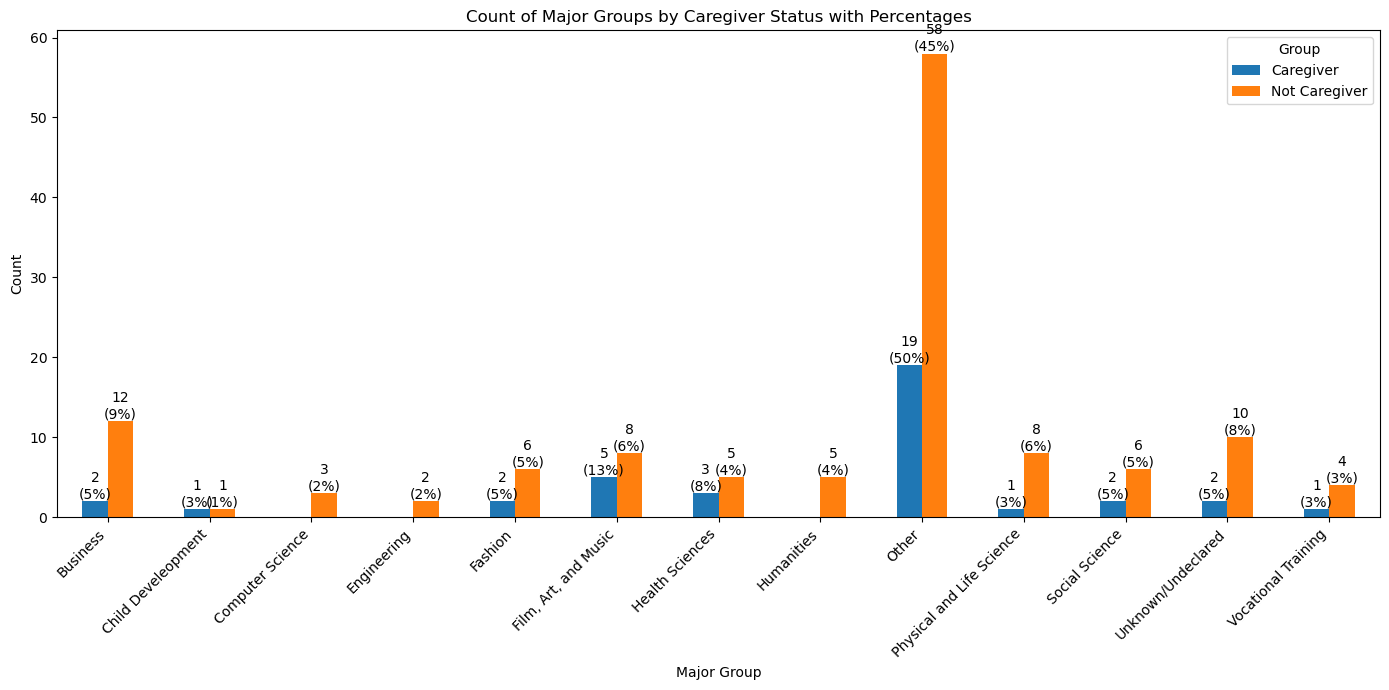

In [15]:
# Question 9 : Major

def map_major_to_group(major):
    for majors, group in group_mapping:
        if major in majors:
            return group
    return 'Other'


# Provided group mapping
group_mapping = [
    (['Fashion', 'Apparel Design', 'Merchandising'], 'Fashion'),
    (['Business', 'Business Economics', 'Business Administration', 'Real Estate', 'Buisness'], 'Business'),
    (['Film', 'Multimedia', 'Digital Imaging', 'Art', 'Graphic Design', 'Music', 'Music Production', 'Music, Art'], 'Film, Art, and Music'),
    (['Engineering', 'Mechanical Engineering', 'Electrical Engineering'], 'Engineering'),
    (['Unknown', 'Undeclared', 'Blank', 'General Studies', 'Undecided'], 'Unknown/Undeclared'),
    (['Psychology', 'Sociology', 'Social Work', 'Administration of Justice', 'Political Science', 'Criminal justice', 'Legal Studies', 'Urban Studies'], 'Social Science'),
    (['EMT', 'Fire Science', 'Culinary Arts', 'Carpentry'], 'Vocational Training'),
    (['Computer Science', 'Cybersecurity', 'Data Science', 'Computer science'], 'Computer Science'),
    (['Physics', 'Astronomy', 'Biology', 'Biotechnology', 'Natural Sciences', 'Neuroscience', 'Chemistry', 'Marine Biology', 'Psycology, Neuroscience', 'Math', 'Mathmatics'], 'Physical and Life Science'),
    (['Nursing', 'Physician Assistant', 'Radiology', 'Medicine', 'Kinesiology', 'Public Health', 'Nurse', 'Health Science', 'Accounting, Healthcare', 'Nutrition'], 'Health Sciences'),
    (['Japanese', 'Spanish', 'Communications', 'Communication', 'Humanities', 'English', 'History', 'Philosophy', 'Liberal Arts'], 'Humanities'),
    (['Child Development'], 'Child Develeopment'),
    (['Architecture', 'Landscape Architecture'], 'Architecture'),
]



# -- Your data and mapping setup as before --

# Add 'Major Group' column and group label
survey_caregiver['Major Group'] = survey_caregiver['Question 9'].apply(map_major_to_group)
survey_notcaregiver['Major Group'] = survey_notcaregiver['Question 9'].apply(map_major_to_group)

# survey_caregiver['Major Group'] = survey_caregiver['Question 9'].apply(group_mapping)
# survey_notcaregiver['Major Group'] = survey_notcaregiver['Question 9'].apply(group_mapping)
survey_caregiver['Group'] = 'Caregiver'
survey_notcaregiver['Group'] = 'Not Caregiver'

# Combine data
combined_df = pd.concat([survey_caregiver, survey_notcaregiver], ignore_index=True)

# Count and percent per group
count_df = combined_df.groupby(['Group', 'Major Group']).size().reset_index(name='Count')
count_df['Percentage'] = count_df.groupby('Group')['Count'].transform(lambda x: (x / x.sum() * 100).round(0).astype(int))

# Pivot for plotting
pivot_df = count_df.pivot(index='Major Group', columns='Group', values='Count').fillna(0).astype(int)
pivot_df = pivot_df.reindex(sorted(pivot_df.index), axis=0)

ax = pivot_df.plot(kind='bar', figsize=(14, 7))
plt.ylabel('Count')
plt.xlabel('Major Group')
plt.title('Count of Major Groups by Caregiver Status with Percentages')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with count and percent
for bars, group in zip(ax.containers, pivot_df.columns):
    for bar in bars:
        height = bar.get_height()
        if height == 0:
            continue  # Only label bars that exist
        major_group = bar.get_x() + bar.get_width() / 2
        # Find the major group by x-tick label
        idx = int(round(bar.get_x()))
        major_group_name = ax.get_xticklabels()[idx].get_text()
        # Get percentage from count_df
        percent_row = count_df[(count_df['Group'] == group) & (count_df['Major Group'] == major_group_name)]
        percent = percent_row['Percentage'].values[0] if not percent_row.empty else 0
        ax.annotate(f'{int(height)}\n({percent}%)',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.legend(title='Group')
plt.tight_layout()
plt.show()

C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3278397393.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=60, ha='right', fontsize=9)


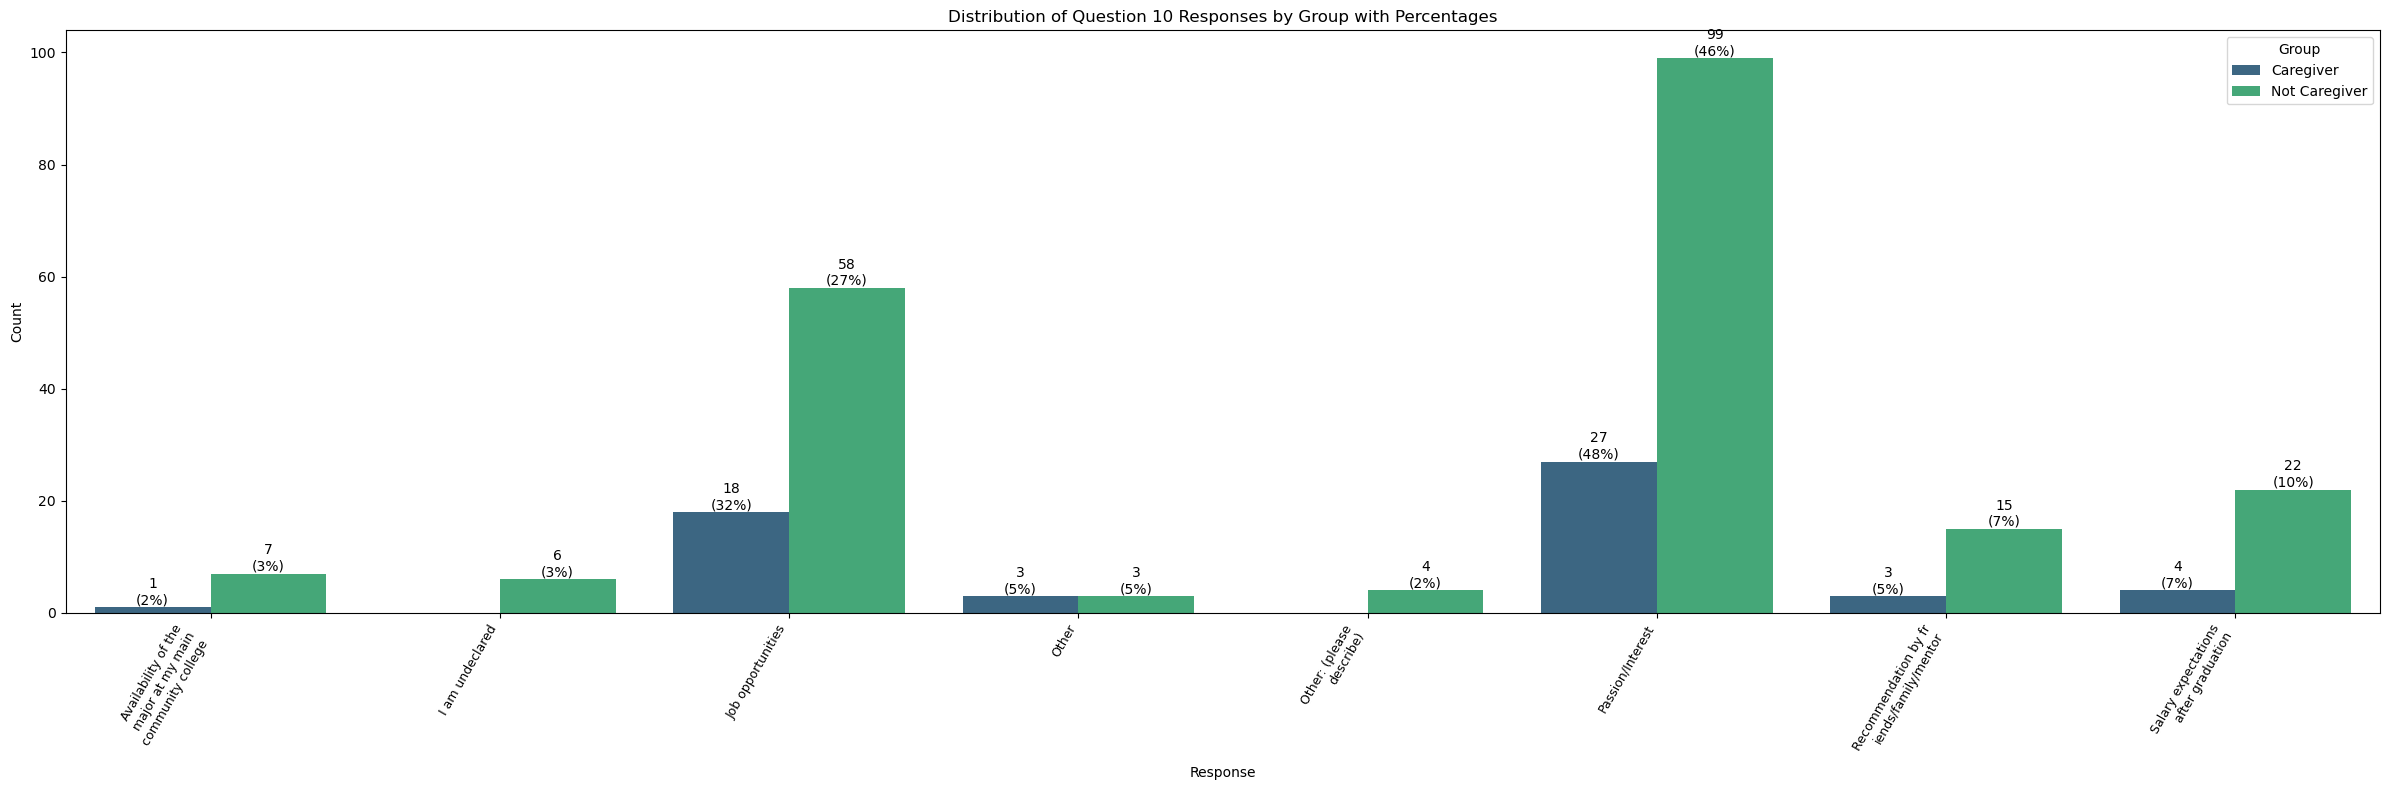

In [16]:
#Question 10 : Reason for Major


# Relabel "Other: (please describe)" to "Other"
def relabel_other(df):
    df = df.copy()
    df['Question 10'] = df['Question 10'].replace({'Other: (please describe)': 'Other'})
    return df

# Prepare data
survey_caregiver_relabel = relabel_other(survey_caregiver)
survey_notcaregiver_relabel = relabel_other(survey_notcaregiver)

# Split and explode comma-separated responses
survey_caregiver_relabel['Question 10'] = survey_caregiver_relabel['Question 10'].str.split(',')
survey_caregiver_exp = survey_caregiver_relabel.explode('Question 10')
survey_caregiver_exp['Question 10'] = survey_caregiver_exp['Question 10'].str.strip()

survey_notcaregiver_relabel['Question 10'] = survey_notcaregiver_relabel['Question 10'].str.split(',')
survey_notcaregiver_exp = survey_notcaregiver_relabel.explode('Question 10')
survey_notcaregiver_exp['Question 10'] = survey_notcaregiver_exp['Question 10'].str.strip()

# Add group labels
survey_caregiver_exp['Group'] = 'Caregiver'
survey_notcaregiver_exp['Group'] = 'Not Caregiver'

# Combine for counting
combined = pd.concat([survey_caregiver_exp, survey_notcaregiver_exp], ignore_index=True)

# Count responses by group
count_df = combined.groupby(['Question 10', 'Group']).size().reset_index(name='Count')

# Calculate percentages within each group (no decimals)
count_df['Percentage'] = count_df.groupby('Group')['Count'].transform(lambda x: (x / x.sum() * 100).round(0).astype(int))

# Prepare for plotting
pivot_df = count_df.pivot(index='Question 10', columns='Group', values='Count').fillna(0).astype(int).reset_index()
melted_counts = count_df.copy()

# Function to wrap labels
def wrap_labels(ax, width=20):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped = '\n'.join(textwrap.wrap(text, width=width))
        labels.append(wrapped)
    ax.set_xticklabels(labels, rotation=60, ha='right', fontsize=9)

# Plot
plt.figure(figsize=(24, 8))
ax = sns.barplot(x='Question 10', y='Count', hue='Group', data=melted_counts, palette='viridis')

# Add count and percentage labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        # Find corresponding row in melted_counts
        x_val = p.get_x() + p.get_width() / 2.
        # Get the response and group for this bar
        response_idx = int(round(p.get_x() + p.get_width() / 2))
        response_labels = [lbl.get_text().replace('\n', ' ') for lbl in ax.get_xticklabels()]
        if response_idx < len(response_labels):
            response = response_labels[response_idx]
            group = p.get_facecolor()
            # Find the correct row in melted_counts
            row = melted_counts[(melted_counts['Question 10'] == response) & (melted_counts['Count'] == height)]
            percent = row['Percentage'].values[0] if not row.empty else 0
            ax.annotate(f'{height}\n({percent}%)', (x_val, height), ha='center', va='bottom', fontsize=10)

wrap_labels(ax, width=20)

plt.title('Distribution of Question 10 Responses by Group with Percentages')
plt.ylabel('Count')
plt.xlabel('Response')
plt.tight_layout()
plt.show()




C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\2925642058.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


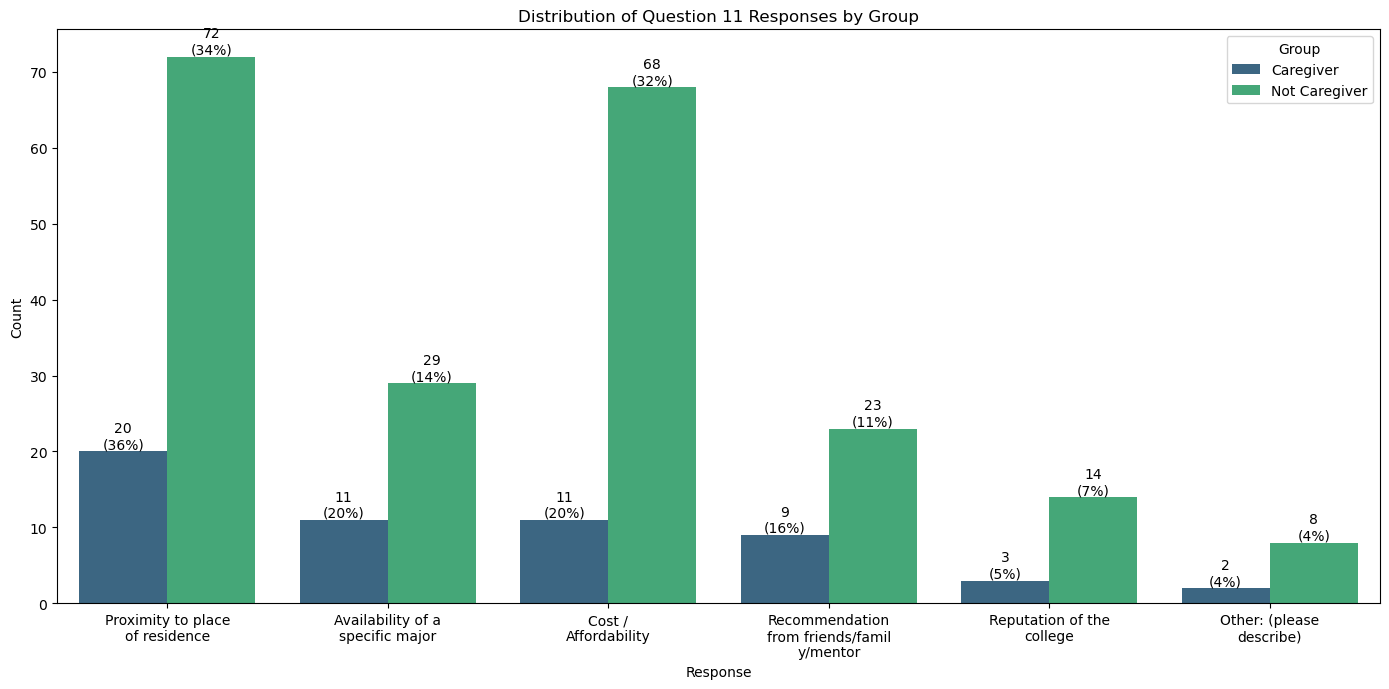

In [17]:
 # Question 11


# Function to split, strip, and explode comma-separated responses
def split_and_clean_explode(df, column):
    df = df.copy()
    df[column] = df[column].str.split(',')
    df = df.explode(column)
    df[column] = df[column].str.strip()
    return df

# Apply to both data frames
caregiver_exp = split_and_clean_explode(survey_caregiver, 'Question 11')
notcaregiver_exp = split_and_clean_explode(survey_notcaregiver, 'Question 11')

# Add group labels
caregiver_exp['Group'] = 'Caregiver'
notcaregiver_exp['Group'] = 'Not Caregiver'

# Combine
combined_exp = pd.concat([caregiver_exp, notcaregiver_exp], ignore_index=True)

# Count responses by group
count_df = combined_exp.groupby(['Group', 'Question 11']).size().reset_index(name='Count')

# Calculate percentages within each group
count_df['Percentage'] = count_df.groupby('Group')['Count'].transform(
    lambda x: (x / x.sum() * 100).round(0).astype(int)
)

# Sort for consistent plotting
count_df = count_df.sort_values(by=['Group', 'Count'], ascending=[True, False])

# Function to wrap labels
def wrap_labels(ax, width=20):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped = '\n'.join(textwrap.wrap(text, width=width))
        labels.append(wrapped)
    ax.set_xticklabels(labels, rotation=0)

# Plotting
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Question 11', y='Count', hue='Group', data=count_df, palette='viridis')

# Add count and percentage labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        # Find the response and group for this bar
        x_pos = bar.get_x() + bar.get_width() / 2
        idx = int(round(bar.get_x() + bar.get_width() / 2))
        # Find closest x-tick label
        response_labels = [lbl.get_text().replace('\n', ' ') for lbl in ax.get_xticklabels()]
        if idx < len(response_labels):
            response = response_labels[idx]
            # Find which group this bar is (order matches hue order)
            group_idx = int(bar.get_x() // (1 / len(ax.containers)))
            group = bar.get_facecolor()
            # Get percentage from count_df
            percent_row = count_df[(count_df['Question 11'] == response) & (count_df['Count'] == height)]
            percent = percent_row['Percentage'].values[0] if not percent_row.empty else 0
            ax.annotate(f'{int(height)}\n({percent}%)', (x_pos, height), ha='center', va='bottom', fontsize=10)

wrap_labels(ax, width=18)

plt.title('Distribution of Question 11 Responses by Group')
plt.ylabel('Count')
plt.xlabel('Response')
plt.tight_layout()
plt.show()


C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\3407069990.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


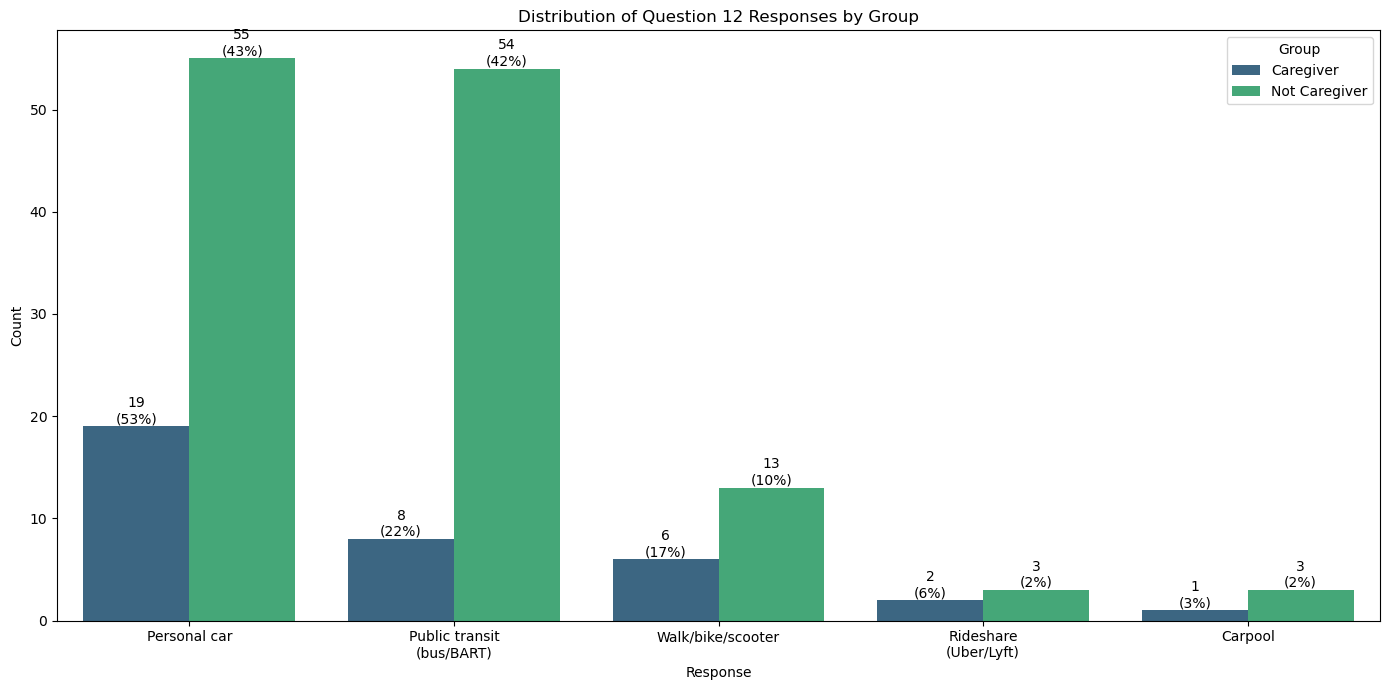

In [18]:
# Question 12

# Relabel "Other: (please describe)" to "Other"
def relabel_other(df):
    df = df.copy()
    df['Question 12'] = df['Question 12'].replace({'Other: (please describe)': 'Other'})
    return df

survey_caregiver_relabel = relabel_other(survey_caregiver)
survey_notcaregiver_relabel = relabel_other(survey_notcaregiver)

# Add group labels
survey_caregiver_relabel['Group'] = 'Caregiver'
survey_notcaregiver_relabel['Group'] = 'Not Caregiver'

# Combine data
combined_df = pd.concat([survey_caregiver_relabel, survey_notcaregiver_relabel], ignore_index=True)

# Count responses by group
count_df = combined_df.groupby(['Group', 'Question 12']).size().reset_index(name='Count')

# Calculate percentages within each group (no decimals)
count_df['Percentage'] = count_df.groupby('Group')['Count'].transform(lambda x: (x / x.sum() * 100).round(0).astype(int))

# Sort for consistent plotting
count_df = count_df.sort_values(by=['Group', 'Count'], ascending=[True, False])

# Function to wrap labels
def wrap_labels(ax, width=18):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped = '\n'.join(textwrap.wrap(text, width=width))
        labels.append(wrapped)
    ax.set_xticklabels(labels, rotation=0)

# Plotting
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Question 12', y='Count', hue='Group', data=count_df, palette='viridis')

# Add count and percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Find the corresponding row in count_df
        x = p.get_x() + p.get_width() / 2.
        response = p.get_x()
        # Get the label and group for this bar
        label = p.get_x()
        # Find the response and group for annotation
        bar_center = p.get_x() + p.get_width() / 2.
        idx = int(round(bar_center))
        # Get the response label from xticklabels
        response_labels = [lbl.get_text().replace('\n', ' ') for lbl in ax.get_xticklabels()]
        if idx < len(response_labels):
            resp = response_labels[idx]
            # Find the correct percentage for this bar
            group = p.get_facecolor()
            # Find the row in count_df
            row = count_df[(count_df['Question 12'] == resp) & (count_df['Count'] == height)]
            percent = row['Percentage'].values[0] if not row.empty else 0
            ax.annotate(f'{int(height)}\n({percent}%)', (bar_center, height), ha='center', va='bottom', fontsize=10)

wrap_labels(ax, width=18)

plt.title('Distribution of Question 12 Responses by Group')
plt.ylabel('Count')
plt.xlabel('Response')
plt.tight_layout()
plt.show()


C:\Users\jcoll\AppData\Local\Temp\ipykernel_47112\468297148.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


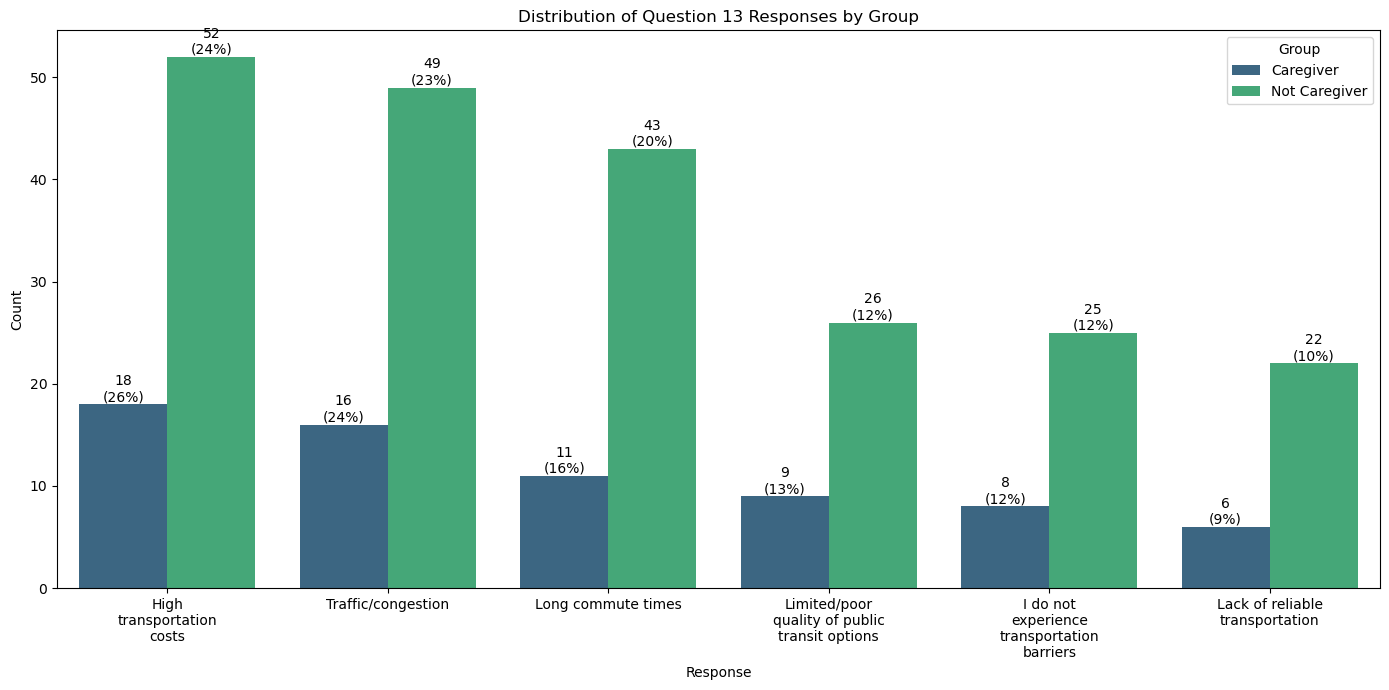

In [19]:
# Question 14 : Transportation Barrier


# Function to split, strip, and explode comma-separated responses
def split_and_clean_explode(df, column):
    df = df.copy()
    df[column] = df[column].str.split(',')
    df = df.explode(column)
    df[column] = df[column].str.strip()
    return df

# Apply to both data frames
caregiver_exp = split_and_clean_explode(survey_caregiver, 'Question 13')
notcaregiver_exp = split_and_clean_explode(survey_notcaregiver, 'Question 13')

# Add group labels
caregiver_exp['Group'] = 'Caregiver'
notcaregiver_exp['Group'] = 'Not Caregiver'

# Combine
combined_exp = pd.concat([caregiver_exp, notcaregiver_exp], ignore_index=True)

# Count responses by group
count_df = combined_exp.groupby(['Group', 'Question 13']).size().reset_index(name='Count')

# Calculate percentages within each group (no decimals)
count_df['Percentage'] = count_df.groupby('Group')['Count'].transform(
    lambda x: (x / x.sum() * 100).round(0).astype(int)
)

# Sort for consistent plotting
count_df = count_df.sort_values(by=['Group', 'Count'], ascending=[True, False])

# Function to wrap labels
def wrap_labels(ax, width=18):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped = '\n'.join(textwrap.wrap(text, width=width))
        labels.append(wrapped)
    ax.set_xticklabels(labels, rotation=0)

# Plotting
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Question 13', y='Count', hue='Group', data=count_df, palette='viridis')

# Add count and percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Find the corresponding row in count_df
        x = p.get_x() + p.get_width() / 2.
        # Get the response label from xticklabels
        xticks = [lbl.get_text().replace('\n', ' ') for lbl in ax.get_xticklabels()]
        idx = int(round(p.get_x() + p.get_width() / 2))
        if idx < len(xticks):
            resp = xticks[idx]
            row = count_df[(count_df['Question 13'] == resp) & (count_df['Count'] == height)]
            percent = row['Percentage'].values[0] if not row.empty else 0
            ax.annotate(f'{int(height)}\n({percent}%)', (x, height), ha='center', va='bottom', fontsize=10)

wrap_labels(ax, width=18)

plt.title('Distribution of Question 13 Responses by Group')
plt.ylabel('Count')
plt.xlabel('Response')
plt.tight_layout()
plt.show()
